In [32]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pprint import pprint

%matplotlib inline

In [67]:
example = "P1199"

with open("train/labels/new/"+example+".txt", "r") as f:
    lines = f.readlines()
    print(lines[0])
    bbox = []
    
# Closing file
f.close()

98.0 597.0 122.0 597.0 122.0 622.0 98.0 622.0 small-vehicle 0



In [68]:
import pandas as pd

# Read CSV file into DataFrame df
df = pd.read_csv("train/labels/new/"+example+".txt", header=None, delimiter=' ')

# Show dataframe
#print(df)

data = df.to_numpy()
print(data)

[[98.0 597.0 122.0 ... 622.0 'small-vehicle' 0]
 [302.0 293.0 334.0 ... 324.0 'large-vehicle' 0]
 [109.0 300.0 147.0 ... 338.0 'large-vehicle' 0]
 ...
 [334.0 525.0 370.0 ... 561.0 'large-vehicle' 0]
 [333.0 545.0 368.0 ... 582.0 'large-vehicle' 0]
 [182.0 284.0 220.0 ... 316.0 'large-vehicle' 0]]


In [69]:
imgstr = "train/images/"+example+".png"

In [71]:
bbox = [int(x) for x in data[0][:-2]]
print(bbox)

[98, 597, 122, 597, 122, 622, 98, 622]


(857, 631, 3)
<class 'numpy.ndarray'>
(25, 24, 3)


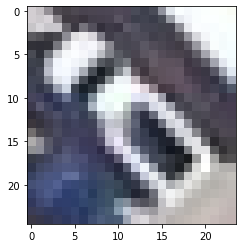

In [72]:
img = Image.open(imgstr)

arr = np.asarray(img)
print(arr.shape)
print(type(arr))

if len(arr.shape)==3:
    img2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4], :]
else:
    # image is black and white
    img2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4]]
    img2 = np.stack((img2,)*3, axis=-1)
print(img2.shape)

plt.imshow(img2)

In [78]:
train_or_val = "train"

for root, dirs, filenames in os.walk(train_or_val+"/images", topdown=False):
    pass

#print(filenames)
j = 0
for file in filenames:
    labelstr = file[:-4] + ".txt"
    if not labelstr in ["P1531.txt", "P2123.txt", "P2152.txt", "P2330.txt"]:
        df = pd.read_csv(train_or_val+'/labels/new/' + labelstr, header=None, delimiter=' ')
        data = df.to_numpy()

        imgstr = train_or_val+"/images/" + file
        img = Image.open(imgstr)
        arr = np.asarray(img)

        for i in range(len(data)):
            try:
                bbox = [int(x) for x in data[i][:-2]]
                if len(arr.shape)==3:
                    arr2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4], :]
                else:
                    # image is black and white
                    arr2 = arr[bbox[1]:bbox[5], bbox[0]:bbox[4]]
                    arr2 = np.stack((arr2,)*3, axis=-1)
                if not os.path.exists('chips_'+train_or_val):
                    os.makedirs('chips_'+train_or_val)

                # create a directory with the class name
                if not os.path.exists('chips_'+train_or_val+'/'+data[i][-2]):
                    os.makedirs('chips_'+train_or_val+'/'+data[i][-2])

                img2 = Image.fromarray(arr2.astype('uint8'), 'RGB')
                img2 = img2.save('chips_'+train_or_val+'/'+data[i][-2]+"/"+str(j)+".png")

                if j%10000==0:
                    print(j)
                j += 1
            except:
                print(labelstr, i, j)

0
10000
P0546.txt 30 13417


KeyboardInterrupt: 

In [76]:
print(labelstr, i, j)

P1872.txt 1 63392


In [25]:
for root, dirs, filenames in os.walk("chips_train", topdown=False):
    pass

sizes_of_each_class = {}
for d in dirs:
    all_sizes = []
    for root, dirs, filenames in os.walk("chips_train/"+d, topdown=False):
        pass
    print(d, len(filenames))
    for f in filenames:
        imgstr = "chips_train/"+d+"/"+f
        img = Image.open(imgstr)
        arr = np.asarray(img)
        all_sizes.append(arr.shape[:2])
    sizes_of_each_class[d] = {
        'min': np.min(all_sizes),
        'max': np.max(all_sizes),
        'mean': np.mean(all_sizes),
        'median': np.median(all_sizes)
    }

baseball-diamond 73
basketball-court 111
bridge 2
ground-track-field 19
harbor 2307
helicopter 18
large-vehicle 3164
plane 1543
roundabout 50
ship 15846
small-vehicle 7673
soccer-ball-field 52
storage-tank 58
swimming-pool 1019
tennis-court 1133


In [28]:
pprint(sizes_of_each_class)

{'baseball-diamond': {'max': 1001,
                      'mean': 252.4931506849315,
                      'median': 214.5,
                      'min': 88},
 'basketball-court': {'max': 255,
                      'mean': 164.6936936936937,
                      'median': 173.0,
                      'min': 48},
 'bridge': {'max': 507, 'mean': 288.0, 'median': 288.0, 'min': 69},
 'ground-track-field': {'max': 1703,
                        'mean': 566.3157894736842,
                        'median': 390.5,
                        'min': 28},
 'harbor': {'max': 1441, 'mean': 172.82444733420027, 'median': 127.0, 'min': 9},
 'helicopter': {'max': 147,
                'mean': 44.30555555555556,
                'median': 33.5,
                'min': 18},
 'large-vehicle': {'max': 203,
                   'mean': 70.21317951959544,
                   'median': 68.0,
                   'min': 3},
 'plane': {'max': 703, 'mean': 101.67887232663642, 'median': 84.0, 'min': 12},
 'roundabout': {'max'

In [31]:
print('min', np.min([x['min'] for x in sizes_of_each_class.values()]))
print('max', np.max([x['max'] for x in sizes_of_each_class.values()]))
print('mean', np.mean([x['mean'] for x in sizes_of_each_class.values()]))
print('median', np.median([x['median'] for x in sizes_of_each_class.values()]))

min 2
max 1703
mean 173.59016988078687
median 127.0
